# Identifiability and Backdoor Adjustment Formula

This notebook explores identifiability via the IdentifiabiltyChecker, for the simple triangle graph
with nodes X, Y, Z and arrows X->Y and X<-Z->Y.

We verify that the Backdoor Adjustmen Formula is satisfied.

In [1]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/home/rrtucci/PycharmProjects/JudeasRx


In [2]:
from DoX_BayesNet import *
from graphs.BayesNet import *
from nodes.BayesNode import *
from IdentifiabilityChecker import *
from Plotter_nz import *
import imp
from pprint import pprint
%matplotlib inline

In [4]:
# pots of in_bnet will be selected at random
import random
random.seed(871)

## Building in_bnet

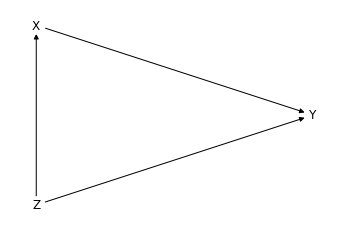

Y , parents=['X', 'Z'] , children=[]
['Z', 'X', 'Y']
[[[0.319 0.681]
  [0.615 0.385]]

 [[0.615 0.385]
  [0.112 0.888]]]

X , parents=['Z'] , children=['Y']
['Z', 'X']
[[0.307 0.693]
 [0.734 0.266]]

Z , parents=[] , children=['Y', 'X']
['Z']
[0.264 0.736]



In [5]:
def build_in_bnet(draw=True):
    nd_X = BayesNode(0, name="X")
    nd_Y = BayesNode(1, name="Y")
    nd_Z = BayesNode(2, name="Z")

    nd_Y.add_parents({nd_X, nd_Z})
    nd_X.add_parents({nd_Z})

    nodes = {nd_X, nd_Y, nd_Z}
    in_bnet = BayesNet(nodes)

    # in general
    # DiscreteCondPot(False, [y1, y2, y3, x]) refers to P(x| y1, y2, y3)
    nd_Z.potential = DiscreteUniPot(False, nd_Z)  # P(a)
    nd_X.potential = DiscreteCondPot(False, [nd_Z, nd_X])  # P(b| a)
    nd_Y.potential = DiscreteCondPot(False, [nd_Z, nd_X, nd_Y])
    for nd in nodes:
        nd.potential.set_to_random()
        nd.potential.normalize_self()
    if draw:
        in_bnet.draw(algo_num=1)
    return in_bnet

    
in_bnet = build_in_bnet(True)
print(in_bnet)

## Building doX bnet

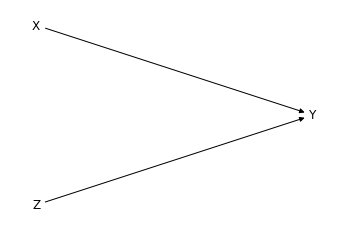

Y , parents=['X', 'Z'] , children=[]
['Z', 'X', 'Y']
[[[0.319 0.681]
  [0.615 0.385]]

 [[0.615 0.385]
  [0.112 0.888]]]

X , parents=[] , children=['Y']
['X']
[1.000 0.000]

Z , parents=[] , children=['Y']
['Z']
[0.264 0.736]



In [6]:
trol_list = []
unobs_nd_list = []
doX_bnet = DoX_BayesNet(in_bnet,
                        trol_list,
                        unobs_nd_list,
                        x_val=0)
doX_bnet.draw(algo_num=1)
print(doX_bnet)

## Node Z is control, no unobserved nodes

world:
0, 1, 2
control nodes: ['Z']
control coords to query bounds (low, high):
{(0,): array([0.679, 0.685]), (1,): array([0.383, 0.387])}
control coords to query statistics (mu, sigma):
{(0,): array([0.682, 0.002]), (1,): array([0.386, 0.002])}


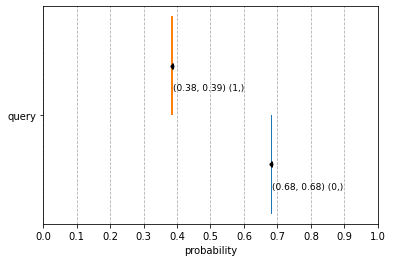

In [7]:
nd_Z = in_bnet.get_node_named("Z")
trol_list = [nd_Z]
unobs_nd_list = []
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=3)
checker.set_query_bds_and_stats()
checker.print_query_bds_and_stats()
Plotter_nz.plot_query_bds(checker.get_query_bds(),
    zname_to_query_stats=checker.get_query_stats(),
    horizontal=True)

## Node Z is unobserved, no control nodes

world:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9
10, 11, 12, 13, 14, 15, 16, 17, 18, 19
20, 21, 22, 23, 24, 25, 26, 27, 28, 29
30, 31, 32, 33, 34, 35, 36, 37, 38, 39
40, 41, 42, 43, 44, 45, 46, 47, 48, 49
50, 51, 52, 53, 54, 55, 56, 57, 58, 59
60, 61, 62, 63, 64, 65, 66, 67, 68, 69
70, 71, 72, 73, 74, 75, 76, 77, 78, 79
80, 81, 82, 83, 84, 85, 86, 87, 88, 89
90, 91, 92, 93, 94, 95, 96, 97, 98, 99
control nodes: []
control coords to query bounds (low, high):
{(): array([0.389, 0.668])}
control coords to query statistics (mu, sigma):
{(): array([0.546, 0.072])}


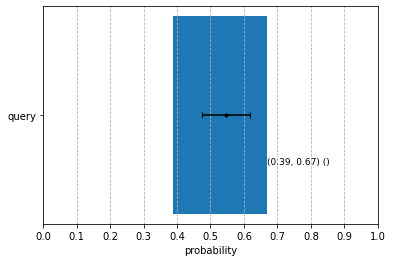

In [8]:
nd_Z = in_bnet.get_node_named("Z")
trol_list = []
unobs_nd_list = [nd_Z]
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=10000,
                          num_worlds=100)
checker.set_query_bds_and_stats()
checker.print_query_bds_and_stats()
Plotter_nz.plot_query_bds(checker.get_query_bds(),
    zname_to_query_stats=checker.get_query_stats(),
    horizontal=True)

## No unobserved or control nodes

world:
0, 1, 2
control nodes: []
control coords to query bounds (low, high):
{(): array([0.626, 0.639])}
control coords to query statistics (mu, sigma):
{(): array([0.631, 0.005])}


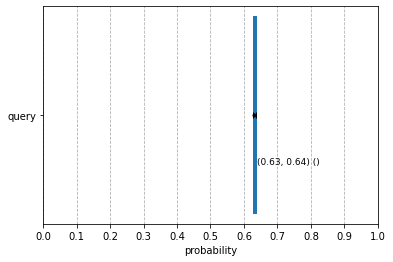

In [9]:
trol_list = []
unobs_nd_list = []
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=10000,
                          num_worlds=3)
checker.set_query_bds_and_stats()
checker.print_query_bds_and_stats()
Plotter_nz.plot_query_bds(checker.get_query_bds(),
    zname_to_query_stats=checker.get_query_stats(),
    horizontal=True)

Next we check that the Backdoor Adjustment Formula holds.
$$P(Y=1|do(X)=0) = \sum_z P(y|x,z)P(z)$$

In [10]:
# entry (0,1) of the following matrix is the Backdoor Adjustment Formula prediction
# for mean mu in "control coords to query statistics" above.
nd_Z = doX_bnet.get_node_named("Z")
nd_Y = doX_bnet.get_node_named("Y")
nd_X = doX_bnet.get_node_named("X")
pot_YZbX = nd_Y.potential*nd_Z.potential
pot_YbX = pot_YZbX.get_new_marginal([nd_X, nd_Y])
pot_YbX.set_to_transpose([nd_X, nd_Y])
print(pot_YbX.pot_arr)

[[0.369 0.631]
 [0.530 0.470]]
